In [1]:
#importing necessary packages
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn import cluster
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

In [2]:
start = time.time()
f = open("docword.nips.txt","r")
a = f.readlines()
b = a[0:3]
a = a[3:]
f.close()
a = [i.replace("\n","") for i in a]
b = [i.replace("\n","") for i in b]
a = [i.split(" ") for i in a]
df = pd.DataFrame(a)
df

,0,1,2
0,1,2,1
1,1,39,1
2,1,42,3
3,1,77,1
4,1,95,1
...,...,...,...
746311,1500,12382,1
746312,1500,12388,3
746313,1500,12390,1
746314,1500,12393,1


In [3]:
#Creating list of unique Document IDs
docID = df[0].unique()
docID = list(docID)
docID = list(map(int,docID))
len(docID)

1500

In [4]:
#Building the required sparse matrix
M = np.zeros([12420,1501])

In [5]:
#Creating list of word IDs in each Document IDs
for j in range(len(df[1])):
    M[int(df[1][j]),int(df[0][j])] = 1
SM = pd.DataFrame(M)
SM = SM.iloc[1:,1:]
SM

,1,2,3,4,5,6,7,8,9,10,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Calculating Jaccard indexes
Sym = SM.to_numpy()
Sym = np.transpose(Sym)
J = 1-pairwise_distances(Sym,metric="jaccard")
J = pd.DataFrame(J)
J

C:\Users\AVIK DAS\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,1.000000,0.165948,0.155556,0.171818,0.184632,0.135041,0.165259,0.135338,0.164229,0.182851,...,0.140312,0.143005,0.155340,0.136782,0.159715,0.148494,0.157513,0.145880,0.140719,0.007042
1,0.165948,1.000000,0.150259,0.164884,0.197452,0.124575,0.154930,0.157895,0.171301,0.168844,...,0.157778,0.159255,0.169409,0.130191,0.152239,0.135354,0.156983,0.149286,0.133789,0.010381
2,0.155556,0.150259,1.000000,0.155263,0.157681,0.121924,0.150463,0.129383,0.157952,0.136628,...,0.138528,0.147059,0.154502,0.146561,0.149606,0.164271,0.158907,0.143939,0.167498,0.004535
3,0.171818,0.164884,0.155263,1.000000,0.199461,0.115242,0.186255,0.113189,0.167748,0.155143,...,0.141682,0.158813,0.167492,0.158397,0.176724,0.168569,0.160900,0.131769,0.150547,0.012150
4,0.184632,0.197452,0.157681,0.199461,1.000000,0.140782,0.167243,0.152542,0.205128,0.174556,...,0.165577,0.158266,0.194203,0.173469,0.176587,0.164813,0.179513,0.164680,0.162268,0.010056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.148494,0.135354,0.164271,0.168569,0.164813,0.106638,0.144154,0.092166,0.127749,0.146860,...,0.165027,0.212924,0.172217,0.136714,0.183183,1.000000,0.183861,0.157838,0.205493,0.007839
1496,0.157513,0.156983,0.158907,0.160900,0.179513,0.127193,0.146232,0.121637,0.140461,0.161979,...,0.174482,0.200415,0.218627,0.132609,0.229897,0.183861,1.000000,0.168467,0.204431,0.019016
1497,0.145880,0.149286,0.143939,0.131769,0.164680,0.108491,0.133983,0.125323,0.128668,0.149068,...,0.248737,0.136170,0.179775,0.131673,0.165612,0.157838,0.168467,1.000000,0.172487,0.027466
1498,0.140719,0.133789,0.167498,0.150547,0.162268,0.104822,0.159822,0.109234,0.133266,0.150376,...,0.188578,0.227414,0.209724,0.139808,0.197446,0.205493,0.204431,0.172487,1.000000,0.007527


C:\Users\AVIK DAS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


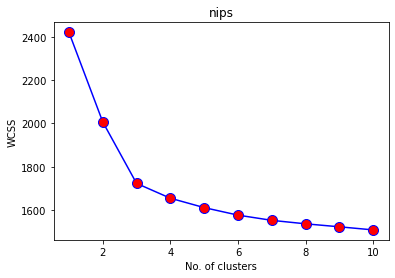

In [7]:
#Fitting the model for different number of clusters
l = []
for i in range(1,11):
    model = KMeans(n_clusters=i,init="k-means++",max_iter=50,n_init=10)
    model.fit(J)
    l.append(model.inertia_)
plt.title("nips")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.plot(list(range(1,11)),l,c="b",marker="o",markerfacecolor="red",markersize=10)

In [25]:
#Final fitting of the model using optimum number of clusters
k_means = cluster.KMeans(n_clusters=4,random_state=42)
k_means.fit(J)
y_pred = k_means.predict(J)

C:\Users\AVIK DAS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


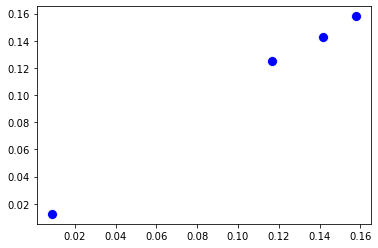

In [26]:
#plotting the centroids
sns.scatterplot(k_means.cluster_centers_[:,0],
               k_means.cluster_centers_[:,1],
               marker="o",
               color="b",
               s=100);

In [21]:
#dimension reduction for visualization
PM = PCA(n_components = 2)
Mnew = PM.fit_transform(J)
x,y = Mnew[:,0],Mnew[:,1]
cluster_col = {0:"orange",1:"green",2:"red",3:"hotpink"}
clusters_names = {0:"cluster1",1:"cluster2",2:"cluster3",3:"cluster4"}
clusters = k_means.labels_.tolist()

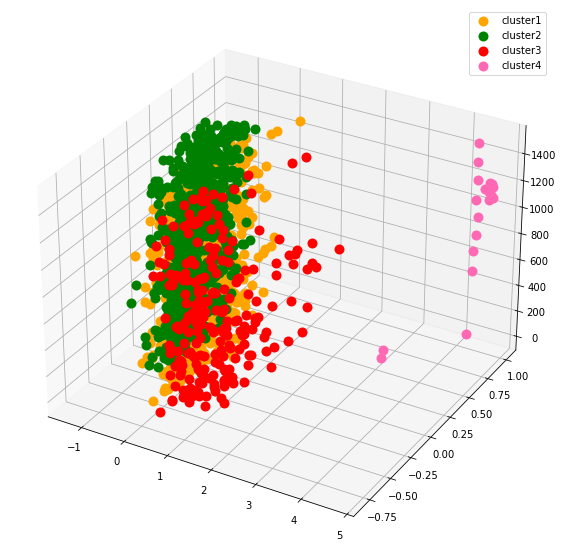

In [22]:
#3d plot for visualizing the different clusters
D = pd.DataFrame(dict(x = x, y = y, z = J.columns, label = clusters))
G = D.groupby("label")

plt.figure('NIPS', figsize = (20,10))
axis = plt.axes(projection = '3d')
axis.margins(0.05)

for name, group in G:
    axis.plot(group.x, group.y, group.z, marker = "o", linestyle = "", ms = 10, 
              label = clusters_names[name], color= cluster_col[name], mec = 'none')
    axis.set_aspect('auto')
    axis.tick_params(\
                     axis = 'x',
                     which = 'both',
                     bottom = 'off',
                     top = 'off',
                     labelbottom = 'off')
    axis.tick_params(\
                     axis = 'y',
                     which = 'both',
                     bottom = 'off',
                     top = 'off',
                     labelbottom = 'off')

axis.legend(numpoints = 1)

In [12]:
#Giving output in the form of document IDs belonging to different clusters
output = {}
for i in np.unique(y_pred):
    output[i] = []
    for j in range(len(y_pred)):
        if y_pred[j] == i:
             output[i].append(j+1)
print(output)
for i in np.unique(y_pred):
    print(i,":",len(output[i]))

{0: [6, 8, 11, 12, 24, 25, 26, 27, 31, 33, 34, 35, 36, 37, 38, 39, 40, 44, 48, 49, 52, 55, 60, 62, 64, 65, 66, 67, 70, 71, 76, 78, 79, 80, 84, 91, 94, 95, 99, 101, 107, 110, 117, 119, 120, 121, 123, 126, 128, 129, 130, 131, 132, 135, 136, 139, 140, 141, 145, 159, 163, 164, 168, 170, 171, 172, 175, 176, 177, 178, 189, 190, 191, 195, 197, 198, 200, 203, 204, 205, 206, 209, 211, 213, 216, 218, 220, 221, 222, 224, 228, 230, 231, 233, 235, 236, 238, 239, 243, 244, 246, 248, 249, 251, 252, 253, 254, 255, 256, 257, 259, 269, 273, 274, 277, 278, 279, 285, 290, 291, 292, 294, 295, 297, 298, 299, 303, 304, 310, 313, 325, 327, 328, 329, 330, 331, 332, 335, 340, 342, 346, 348, 351, 352, 353, 354, 355, 356, 357, 358, 359, 361, 369, 370, 372, 374, 375, 376, 377, 381, 385, 386, 390, 391, 392, 393, 401, 402, 404, 410, 422, 423, 427, 428, 429, 431, 435, 449, 461, 464, 467, 468, 471, 472, 473, 474, 480, 485, 486, 487, 493, 495, 500, 501, 503, 505, 506, 508, 510, 511, 513, 517, 519, 520, 523, 524, 525, 5

In [13]:
#memory used
%load_ext memory_profiler 
from memory_profiler import profile
%memit k_means.fit(J)

peak memory: 582.61 MiB, increment: 17.23 MiB


In [14]:
end = time.time()
print("Time taken:",end-start)

Time taken: 51.86399865150452
